## Imports

In [75]:
import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [78]:
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

font = {'family' : 'Optima',
        'weight' : 'regular',
        'size'   : 16}
plt.rc('font', **font)
plt.rc('xtick', labelsize=15)     # tick labels bigger
plt.rc('ytick', labelsize=15)     # tick labels bigger
plt.rc('savefig', dpi=300)       # higher res outputs

### Reading dataset

In [79]:
df = pd.read_csv('/Users/kritikanayyar/Documents/MMA/3 & 4. Complementary Courses Selection/2. INSY-695-075-Adv Topics in Information Syst (Jan-Feb)/Group Project/bank+marketing 2/bank/bank-full.csv', encoding='utf-8', delimiter=';')

Dataset can be download from https://archive.ics.uci.edu/dataset/222/bank+marketing

#### Check the data

In [80]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Analyzing the data

#### Check the types

In [81]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### Check the dimensions

In [82]:
df.shape

(45211, 17)

### Check the column names

In [83]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

#### Check data dictionary to understand data

In [84]:
df_description = pd.read_excel('/Users/kritikanayyar/Documents/MMA/3 & 4. Complementary Courses Selection/2. INSY-695-075-Adv Topics in Information Syst (Jan-Feb)/Group Project/bank-data-dictionary.xlsx')

df_description.style.set_properties(subset=['Description'], **{'width': '1000px'})

,Variable Name,Role,Type,Demographic,Description,Units,Missing Values
0,age,Feature,Integer,Age,nan,nan,no
1,job,Feature,Categorical,Occupation,"type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')",nan,no
2,marital,Feature,Categorical,Marital Status,"marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)",nan,no
3,education,Feature,Categorical,Education Level,"(categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')",nan,no
4,default,Feature,Binary,nan,has credit in default?,nan,no
5,balance,Feature,Integer,nan,average yearly balance,euros,no
6,housing,Feature,Binary,nan,has housing loan?,nan,no
7,loan,Feature,Binary,nan,has personal loan?,nan,no
8,contact,Feature,Categorical,nan,"contact communication type (categorical: 'cellular','telephone')",nan,yes
9,day_of_week,Feature,Date,nan,last contact day of the week,nan,no


#### Provide descriptive statistics

In [85]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Checking Columns

In [86]:
df.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

#### Check data dictionary to understand data

### Missing Values Calculation

In [87]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

In [88]:
# Missing values statistics
miss_values = missing_values(df)
miss_values.head(20)

Dataframe has 17 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


#### Check unique values

In [89]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [90]:
int_columns = df.select_dtypes(include='int64')

# Iterate over int columns and print unique values
for column in int_columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'age': [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
Unique values in column 'balance': [ 2143    29     2 ...  8205 14204 16353]
Unique values in column 'day': [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
Unique values in column 'duration': [ 261  151   76 ... 1298 1246 1556]
Unique values in column 'campaign': [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
Unique values in column 'pdays': [ -1 151 166  91  86 143 147  89 140 176 101 174 170 167 195 165 129 188
 196 172 118 119 104 171 117 164 132 131 123 159 186 111 115 116 173 178
 110 152  96 103 150 175 193 181 185 154 145 138 126 180 109 158 168  97
 182 127 130 194 125 1

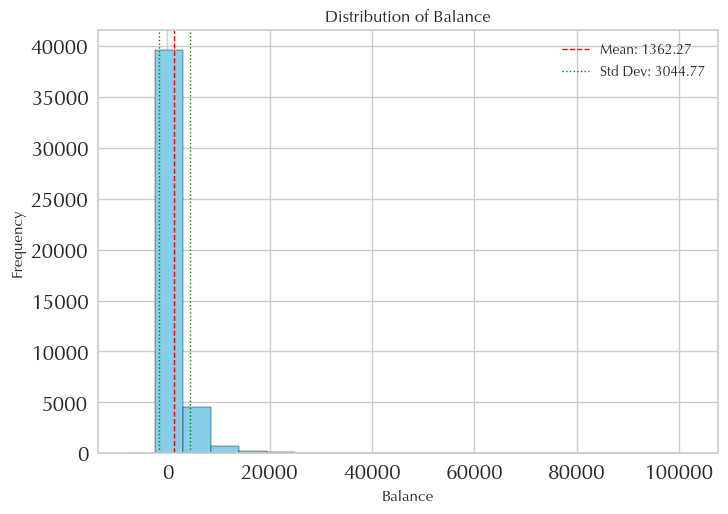

In [91]:
balance_data = df['balance']

# Calculate mean and standard deviation
mean_balance = balance_data.mean()
std_balance = balance_data.std()

# Create histogram
plt.hist(balance_data, bins=20, color='skyblue', edgecolor='black')

# Add mean and standard deviation lines
plt.axvline(mean_balance, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_balance:.2f}')
plt.axvline(mean_balance + std_balance, color='green', linestyle='dotted', linewidth=1, label=f'Std Dev: {std_balance:.2f}')
plt.axvline(mean_balance - std_balance, color='green', linestyle='dotted', linewidth=1)

plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
# Filter columns with datatype 'object'
object_columns = df.select_dtypes(include='object')

# Iterate over object columns and print unique values
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in column 'marital': ['married' 'single' 'divorced']
Unique values in column 'education': ['tertiary' 'secondary' 'unknown' 'primary']
Unique values in column 'default': ['no' 'yes']
Unique values in column 'housing': ['yes' 'no']
Unique values in column 'loan': ['no' 'yes']
Unique values in column 'contact': ['unknown' 'cellular' 'telephone']
Unique values in column 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in column 'poutcome': ['unknown' 'failure' 'other' 'success']
Unique values in column 'y': ['no' 'yes']


#### Checking for duplicates

In [93]:
df.duplicated().sum()

0

### Exploratory Data Analysis

#### Data distributions

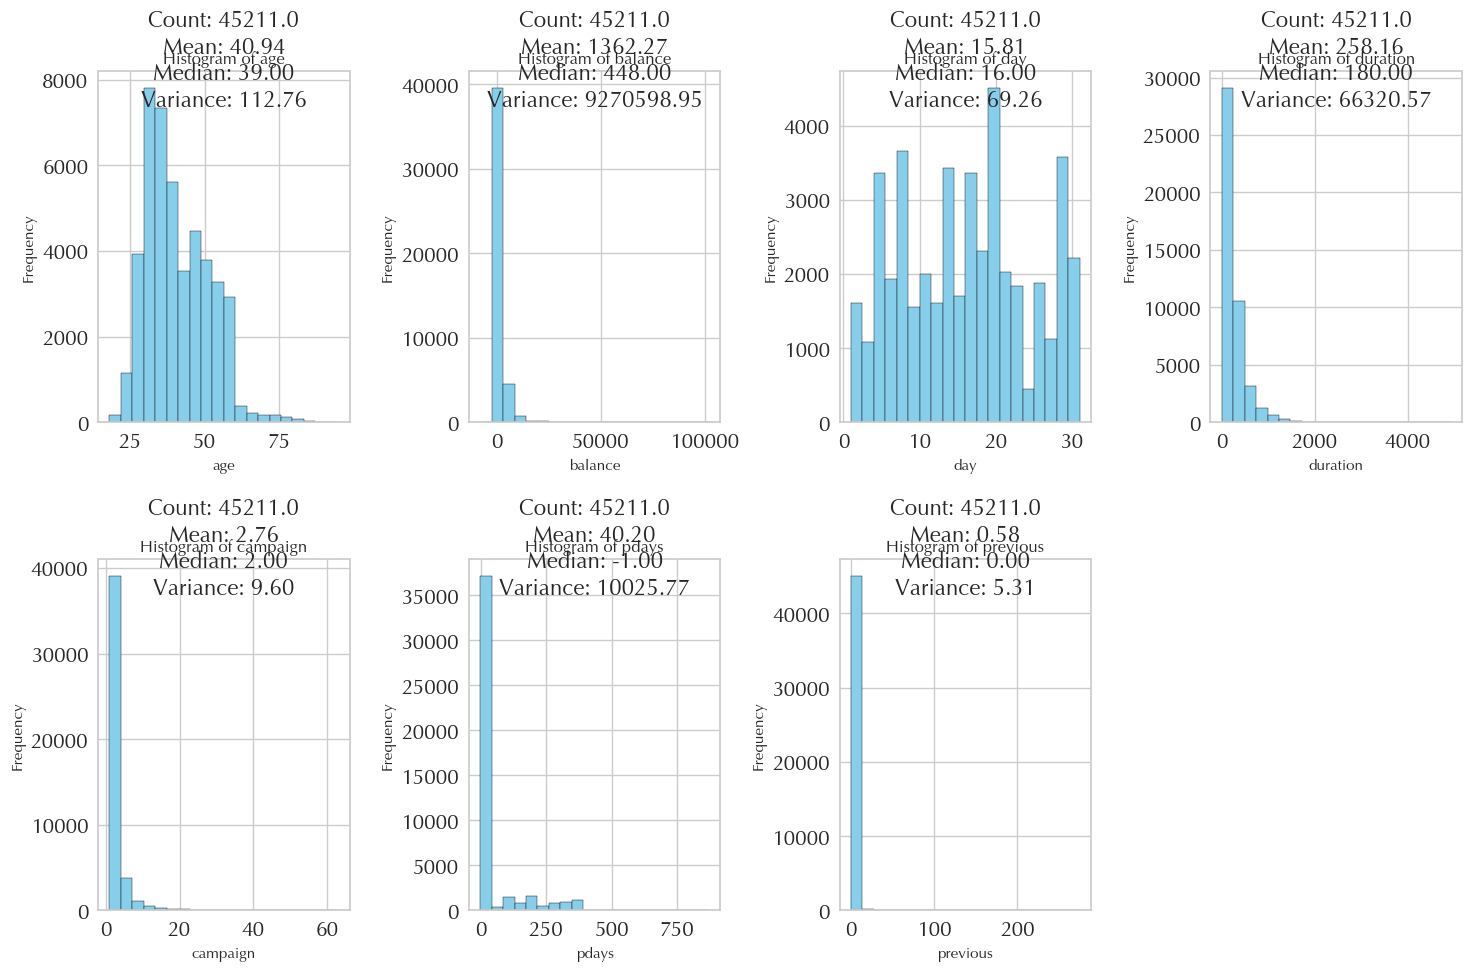

In [94]:
# Create subplots with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over numerical columns and draw histograms
for i, column in enumerate(numerical_columns):
    # Plot histogram
    df[column].hist(ax=axes[i], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    
    # Calculate and annotate statistics
    stats = df[column].describe()
    count = stats['count']
    mean = stats['mean']
    median = stats['50%']  # Median is the 50th percentile
    variation = stats['std'] ** 2  # Variance is the square of standard deviation
    
    axes[i].annotate(f'Count: {count}\nMean: {mean:.2f}\nMedian: {median:.2f}\nVariance: {variation:.2f}', 
                     xy=(0.5, 0.9), xycoords='axes fraction', ha='center')

# Remove empty subplots if there are fewer than 8 numerical columns
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

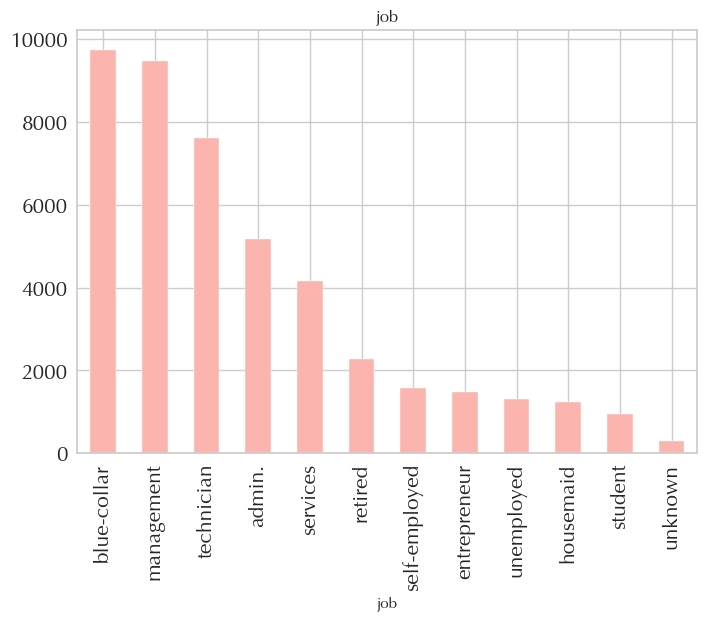

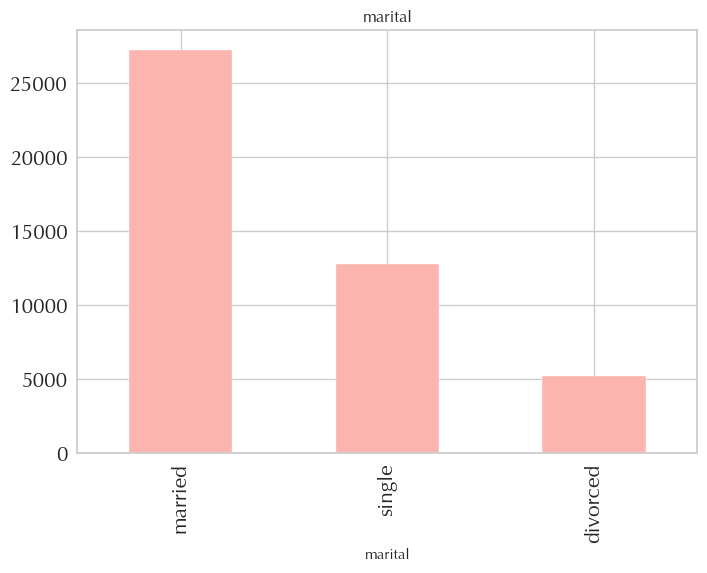

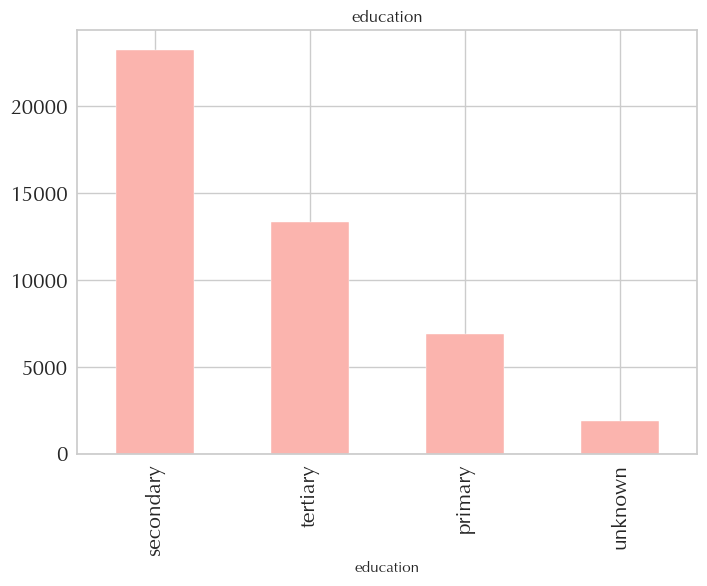

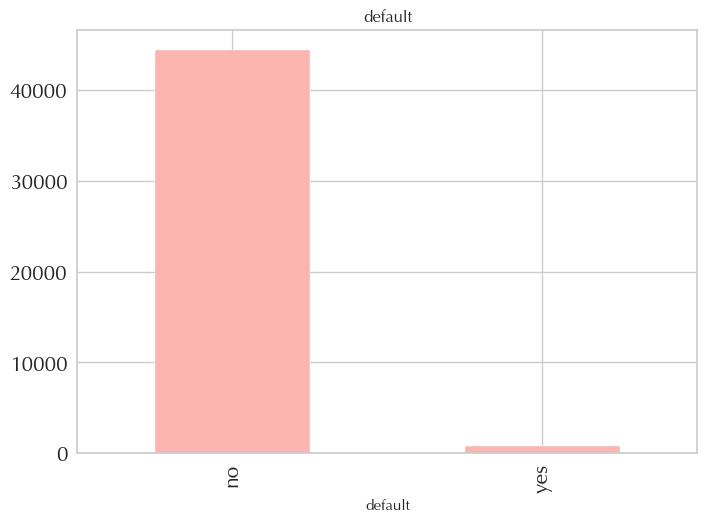

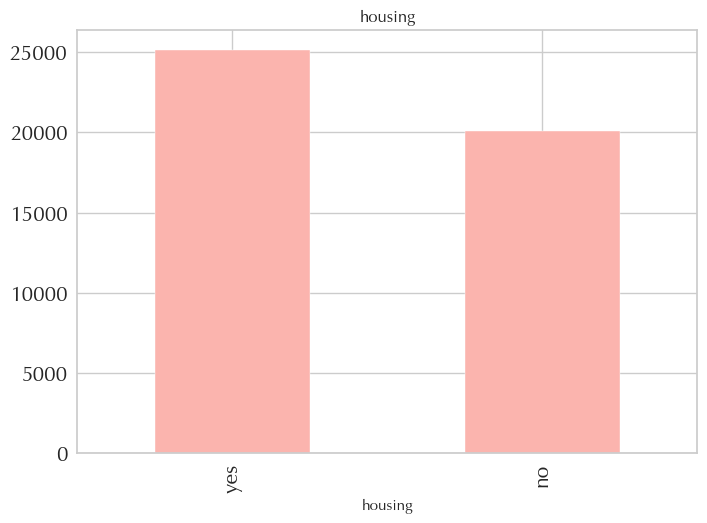

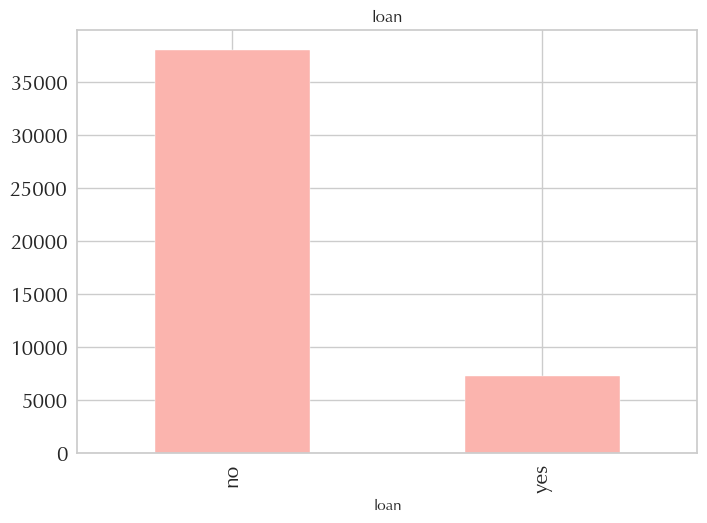

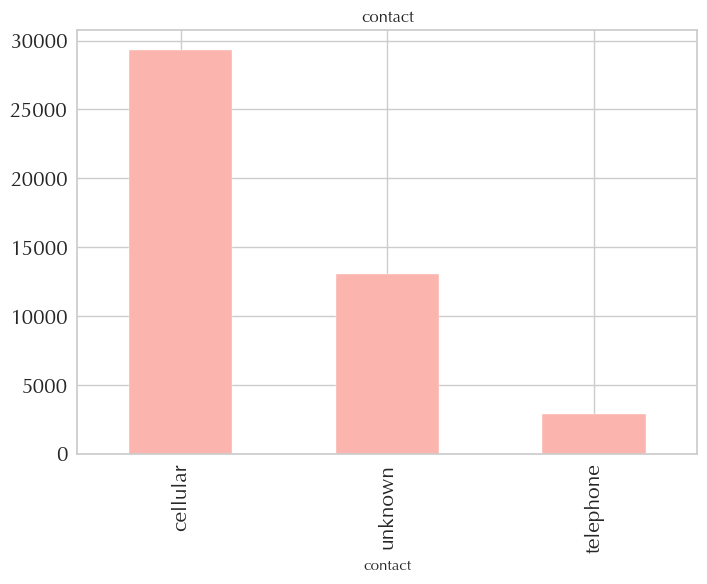

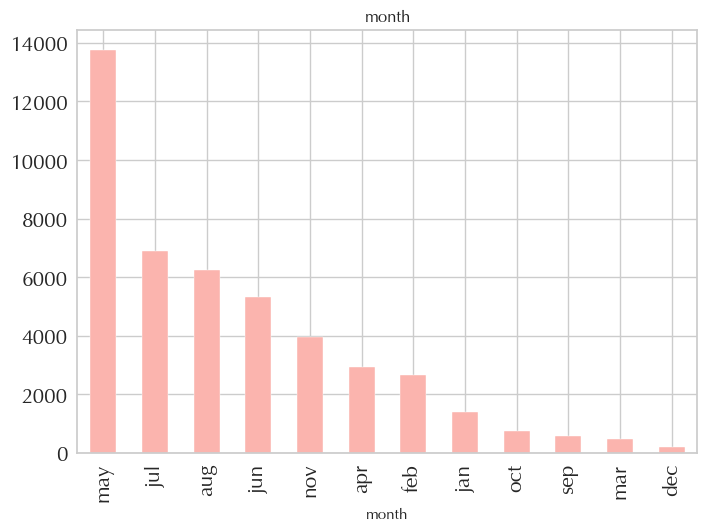

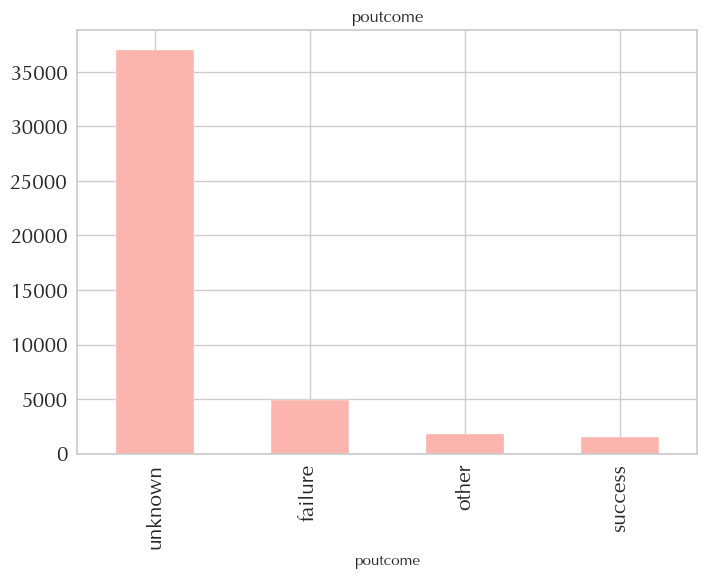

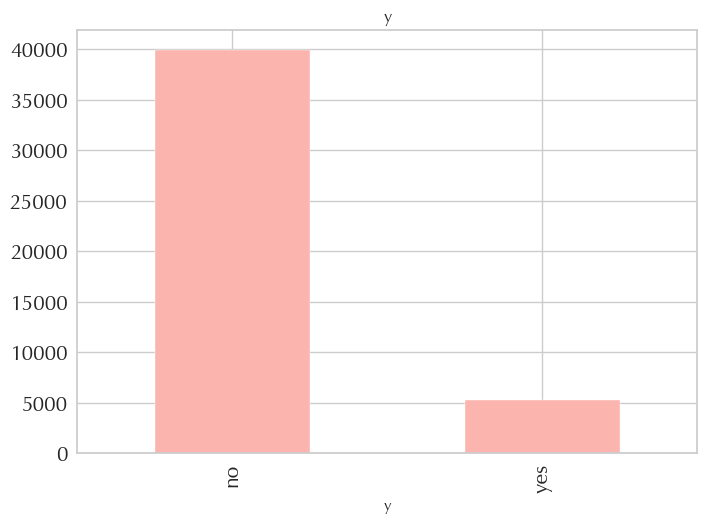

In [95]:
# Bar plot for categorical columns
for column in df.select_dtypes(include='object').columns:
    df[column].value_counts().plot(kind='bar', title=column)
    plt.show()

#### Univariate Analysis
The univariate analysis focuses on exploring individual variables in isolation. It allows you to understand the distribution of each variable and gain insight into its characteristics. Box plots, histograms, and bar charts are commonly used visualizations for univariate analysis.

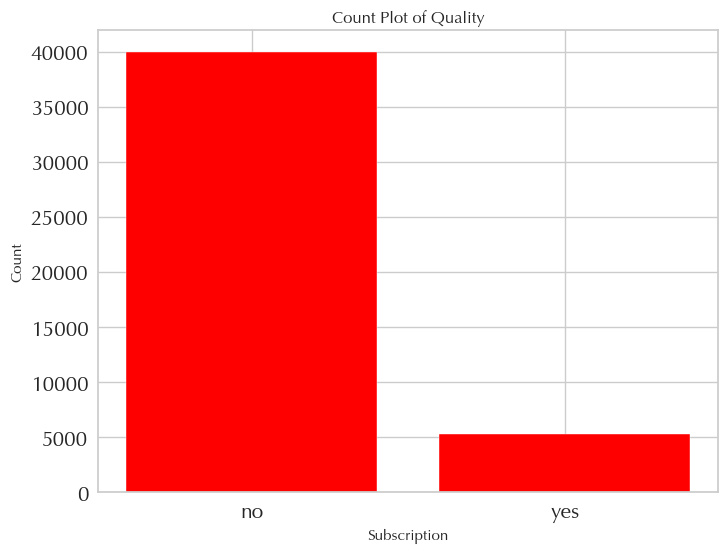

In [96]:
target_counts = df['y'].value_counts()
 
# Using Matplotlib to create a count plot
plt.figure(figsize=(8, 6))
plt.bar(target_counts.index, target_counts, color='red')
plt.title('Count Plot of Quality')
plt.xlabel('Subscription')
plt.ylabel('Count')
plt.show()

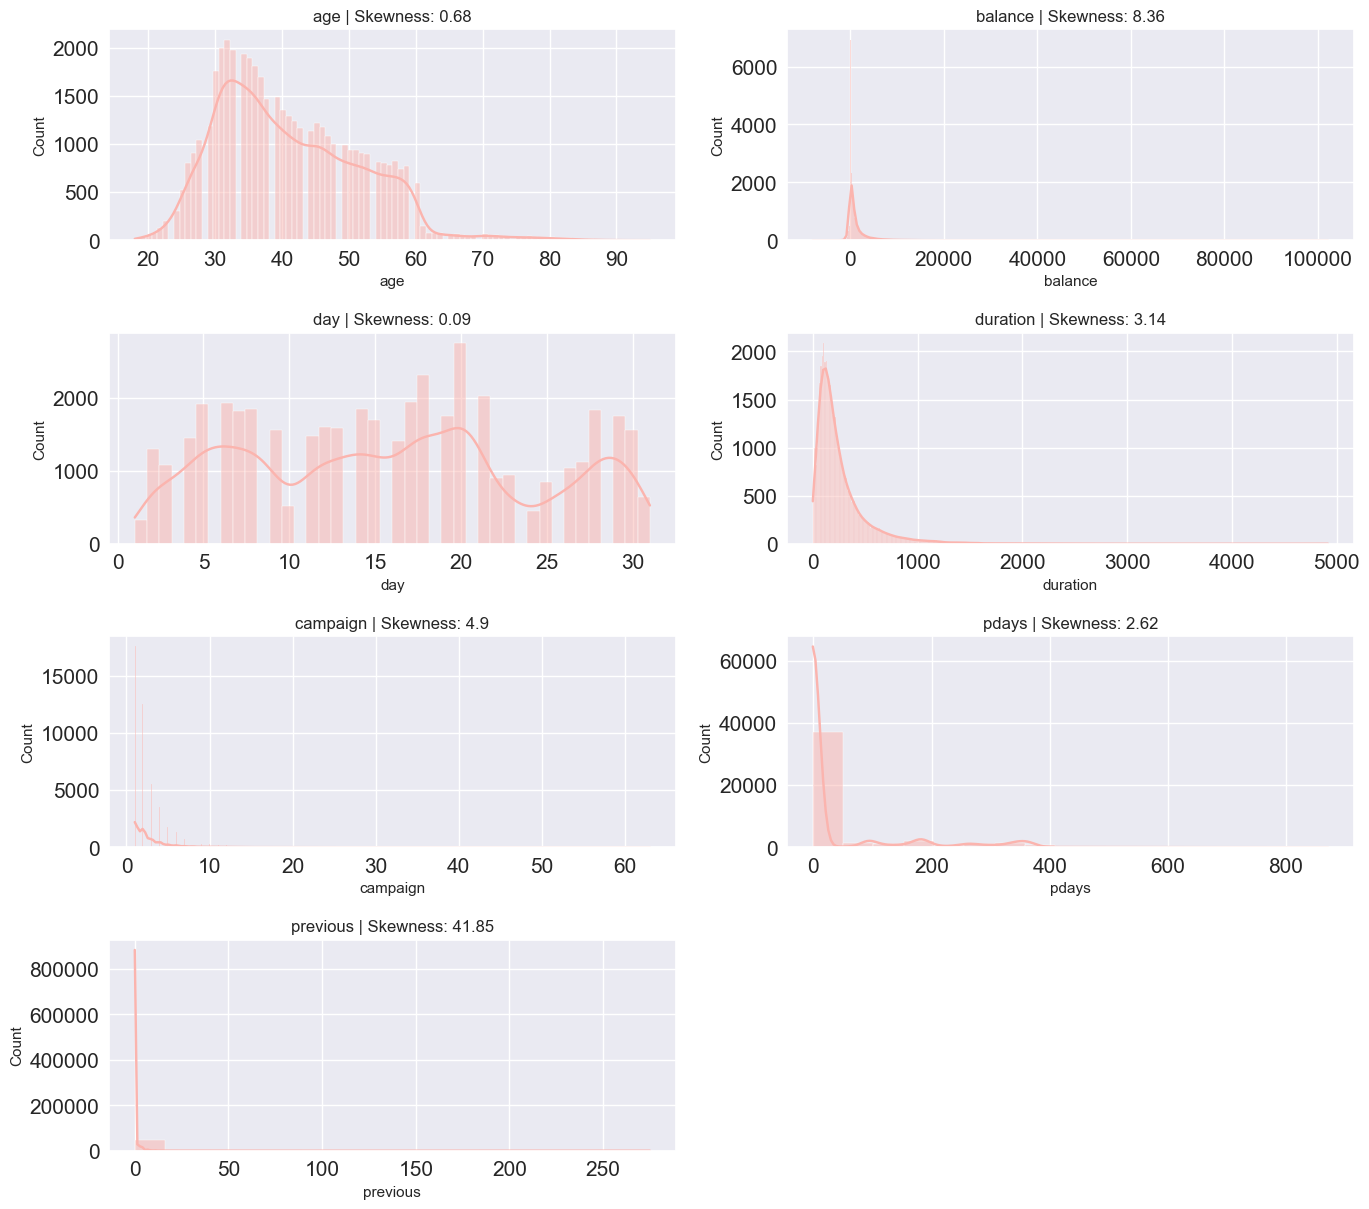

In [97]:
# Set Seaborn style
sns.set_style("darkgrid")
 
# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
 
# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")
 
# Adjust layout and show plots
plt.tight_layout()
plt.show()

#### Detecting outliers

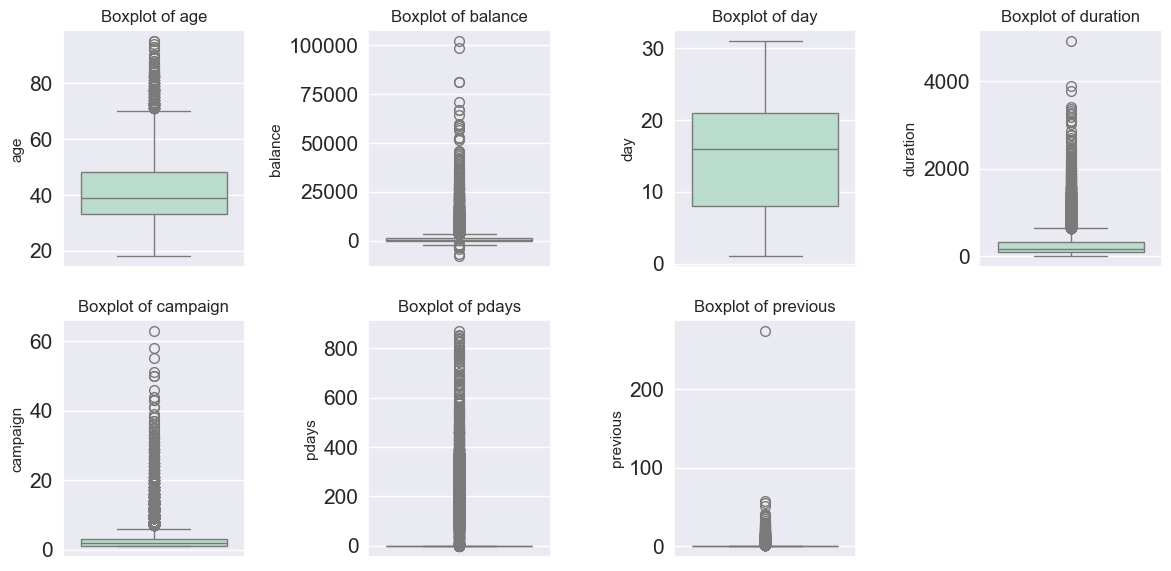

In [98]:
numerical_columns = df.select_dtypes(include='number').columns

# Create subplots with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over numerical columns and draw box plots
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=df[column], ax=axes[i], palette='Pastel2')
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_ylabel(column)

# Remove empty subplots if there are fewer than 8 numerical columns
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Bivariate analysis
Bivariate analysis examines the relationship between two variables. Scatter plots are widely used to visualize the relationship between two continuous variables. Heatmaps and clustered bar charts are helpful when comparing two categorical variables. Understanding the relationships between variables can uncover potential correlations and dependencies, leading to further investigation.

<Figure size 1000x600 with 0 Axes>

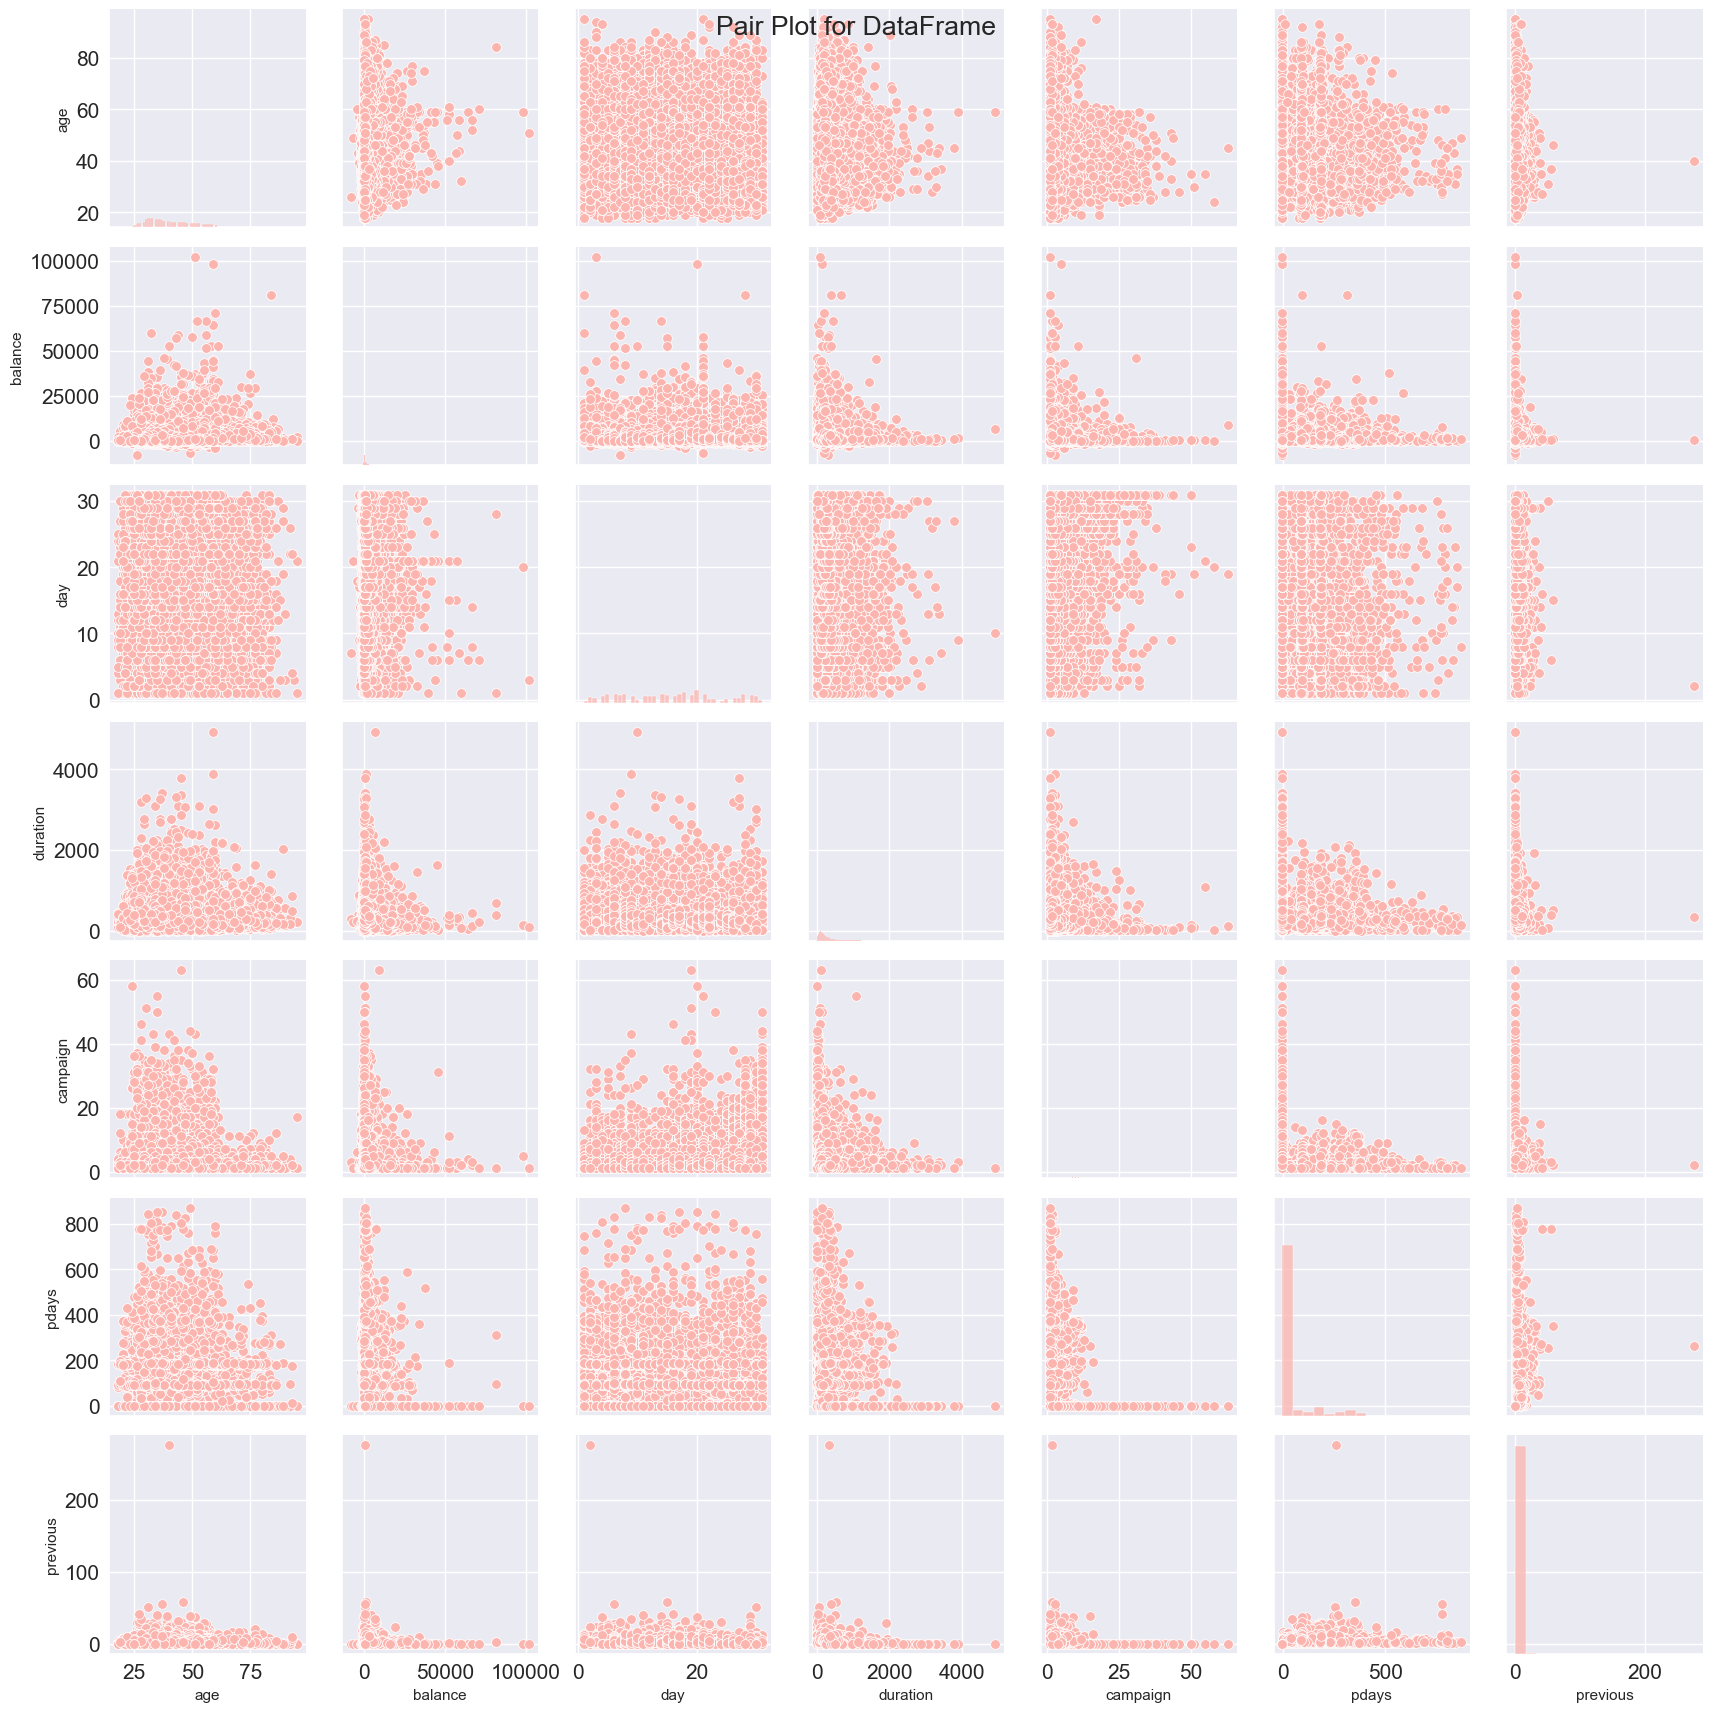

In [99]:
# Set the color palette
sns.set_palette("Pastel1")
 
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))
 
# Using Seaborn to create a pair plot with the specified color palette
sns.pairplot(df)
 
plt.suptitle('Pair Plot for DataFrame')
plt.show()

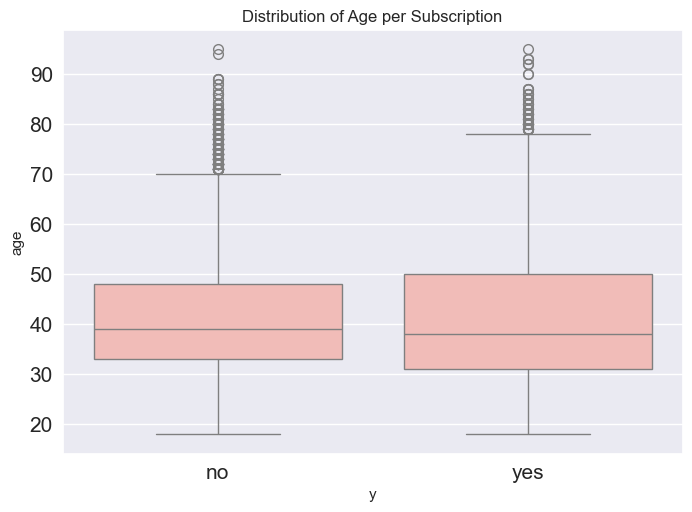

In [102]:
# Plot two boxplots to compare subscription
sns.boxplot(data=df,x='y', y='age')
plt.title("Distribution of Age per Subscription")
plt.show()

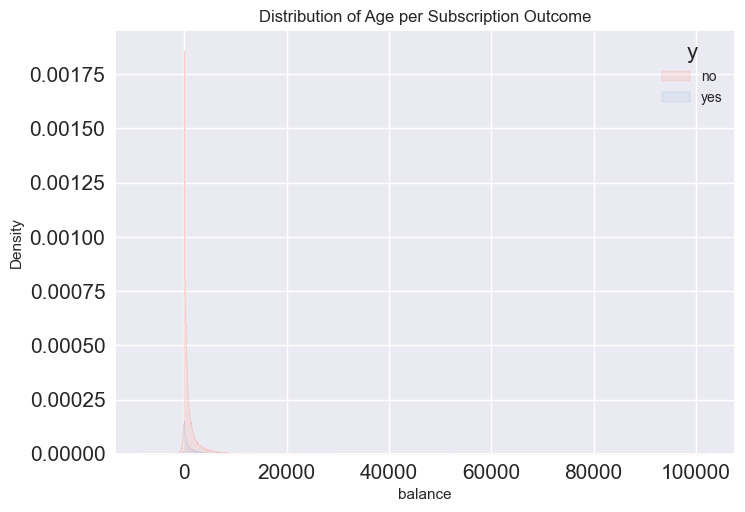

In [104]:
# Create histograms to compare distribution 
sns.histplot(df,x="balance",hue="y",element="step",stat="density")
plt.title("Distribution of Age per Subscription Outcome")
plt.show()

#### Multivariate analysis

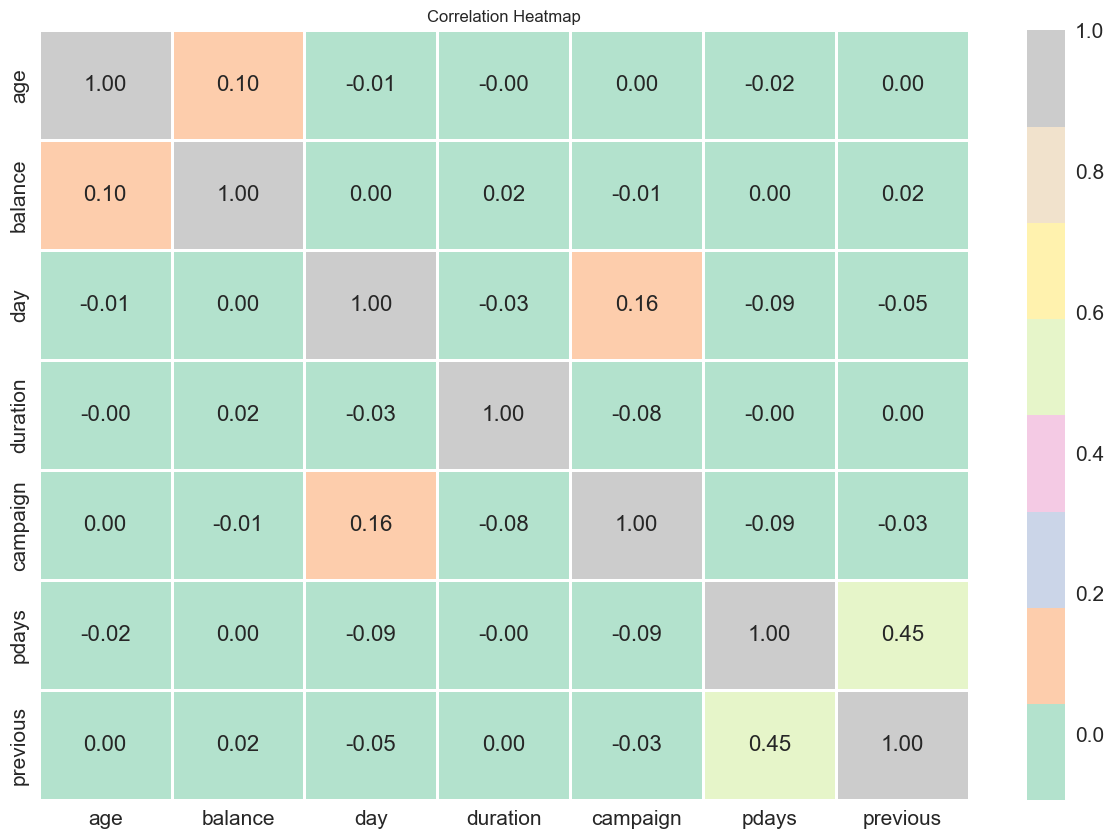

In [101]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()